<a href="https://colab.research.google.com/github/shyamkrishnan1999/spacedata/blob/master/spacedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading our dataset
data=pd.read_csv("https://raw.githubusercontent.com/shyamkrishnan1999/spacedata/master/spacedataset.csv")
data.head()


,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
#Dropping unnecessary columns
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
#Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [5]:
#A small description about data
data.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [6]:
data[' Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [7]:
#Changing the dtype of various columns
d1=data[['Company Name','Location','Detail','Status Rocket',' Rocket']].astype('string')
d2=pd.to_datetime(data['Datum'],utc=True)
d3=data['Status Mission'].astype('string')
data=pd.concat([d1,d2,d3],axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company Name    4324 non-null   string             
 1   Location        4324 non-null   string             
 2   Detail          4324 non-null   string             
 3   Status Rocket   4324 non-null   string             
 4    Rocket         964 non-null    string             
 5   Datum           4324 non-null   datetime64[ns, UTC]
 6   Status Mission  4324 non-null   string             
dtypes: datetime64[ns, UTC](1), string(6)
memory usage: 236.6 KB


In [8]:
#Dropping the null values
data=data.dropna(axis='columns')
data.isna().sum()

Company Name      0
Location          0
Detail            0
Status Rocket     0
Datum             0
Status Mission    0
dtype: int64

In [9]:
#taking values of company names
data['Status Mission'].unique()

<StringArray>
['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']
Length: 4, dtype: string

In [10]:
#creating a new dataframe out of our dataset
dataset=pd.DataFrame()
for i in data['Company Name'].unique():
    success=data[(data['Company Name']==i)&(data['Status Mission']=="Success")].size
    total=data[data['Company Name']==i].size
    success_rate=(success/total)*100
    dataset=dataset.append([{'Company Name':i,'Successful Missions':success,'Total Missions':total,'Success Rate(%)':success_rate}])
    
dataset=dataset.reset_index().drop(columns=['index'])
dataset
    
    

,Company Name,Successful Missions,Total Missions,Success Rate(%)
0,SpaceX,564,600,94.000000
1,CASC,1386,1506,92.031873
2,Roscosmos,306,330,92.727273
3,ULA,834,840,99.285714
4,JAXA,36,42,85.714286
5,Northrop,444,498,89.156627
6,ExPace,54,60,90.000000
7,IAI,54,66,81.818182
8,Rocket Lab,66,78,84.615385
9,Virgin Orbit,0,6,0.000000


In [11]:
#sorting based on sucess rate
postdata=dataset.sort_values(by='Total Missions',ascending=False).head(10)
postdata

,Company Name,Successful Missions,Total Missions,Success Rate(%)
40,RVSN USSR,9684,10662,90.827237
13,Arianespace,1614,1674,96.415771
1,CASC,1386,1506,92.031873
42,General Dynamics,1218,1506,80.876494
32,NASA,1116,1218,91.625616
10,VKS RF,1128,1206,93.532338
47,US Air Force,774,966,80.124224
3,ULA,834,840,99.285714
33,Boeing,786,816,96.323529
43,Martin Marietta,600,684,87.719298


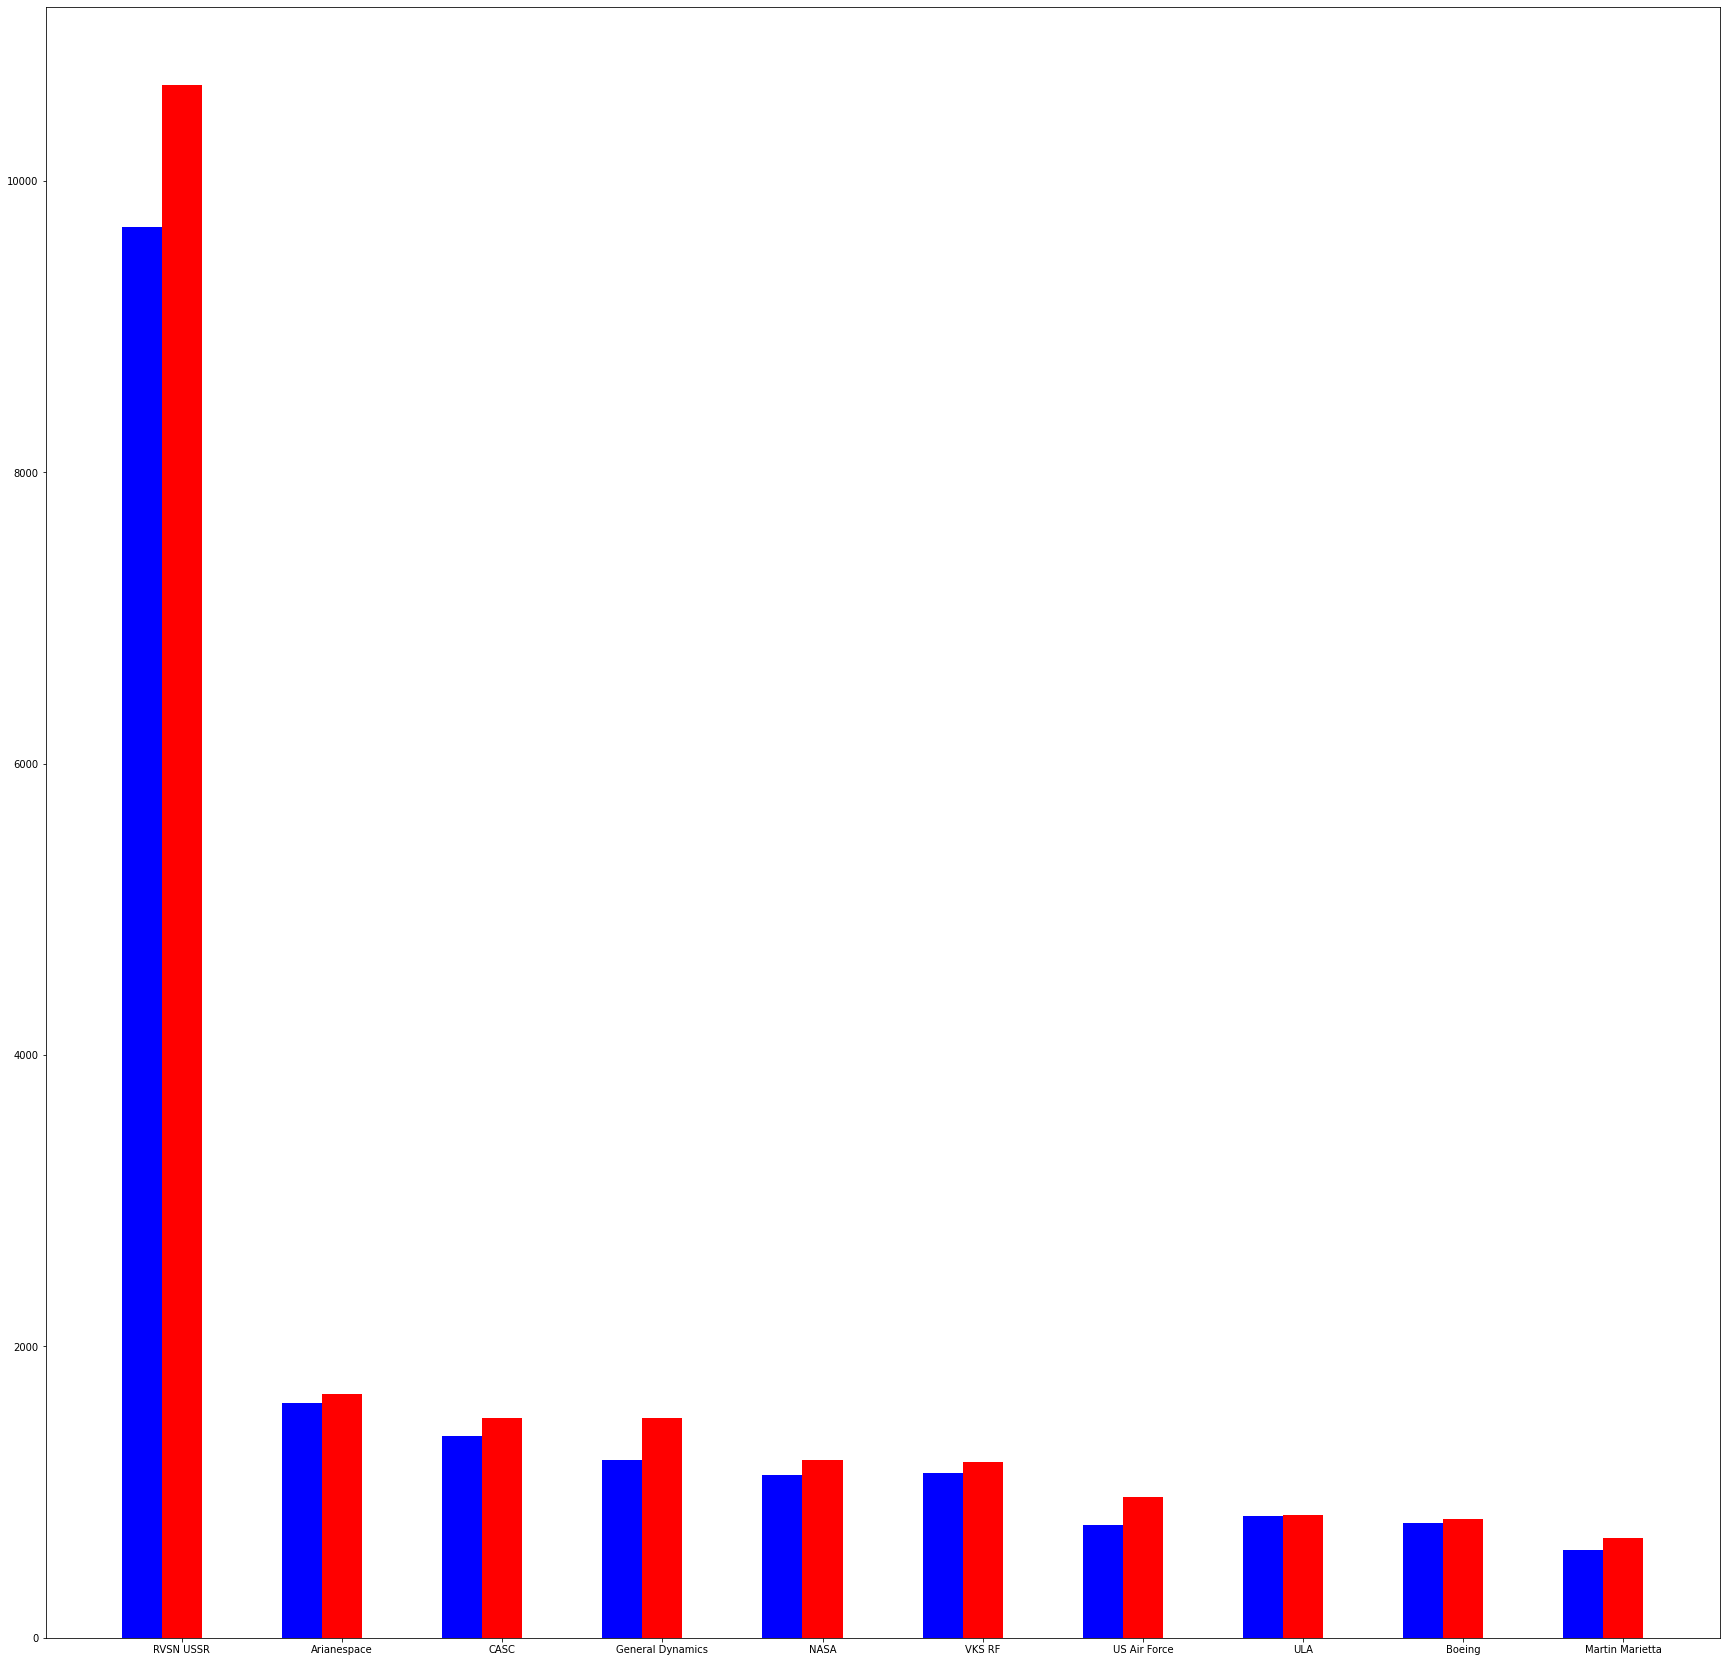

In [12]:
#plotting top 10  companies based on total number of missions
x=np.arange(len(postdata['Company Name'].values))
plt.figure(figsize=(30,30))
plt.bar(x,postdata['Successful Missions'].values,color='b',width=0.25)
plt.bar(x+0.25,postdata['Total Missions'].values,color='r',width=0.25)
plt.xticks(x+0.25,postdata['Company Name'])
plt.show()
